# Import Lib & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Data_engineers_Survey_results.csv') #read dataset

# Data EXPLORATION

In [3]:
df.shape

(600, 46)

In [4]:
df.size

27600

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   GENDER      600 non-null    object
 1   AGE         600 non-null    int64 
 2   EMPLOYMENT  600 non-null    object
 3   STATE       600 non-null    object
 4   REGION      600 non-null    object
 5   EDUCATION   600 non-null    object
 6   QA_M1       600 non-null    object
 7   QA_M2       600 non-null    object
 8   QA_M3       600 non-null    object
 9   QA_M4       549 non-null    object
 10  QA_M5       400 non-null    object
 11  QA_M6       168 non-null    object
 12  QA_M7       34 non-null     object
 13  QA_M8       7 non-null      object
 14  QB          600 non-null    object
 15  QC          600 non-null    object
 16  QD          600 non-null    object
 17  Q1          600 non-null    object
 18  Q2          600 non-null    object
 19  Q3          600 non-null    int64 
 20  Q4        

In [6]:
pd.set_option('display.max_columns', None)
df.head()

,GENDER,AGE,EMPLOYMENT,STATE,REGION,EDUCATION,QA_M1,QA_M2,QA_M3,QA_M4,QA_M5,QA_M6,QA_M7,QA_M8,QB,QC,QD,Q1,Q2,Q3,Q4,Q5_M1,Q5_M2,Q5_M3,Q5_M4,Q5_M5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14_M1,Q14_M2,Q14_M3,Q14_M4,Q14_M5,Q15,QE,QF,QG,QH,QI,QJ
0,Male,39,\tWork full-time,Wisconsin,Midwest,\tGraduate or post-graduate work,Maintain the distributed systems that execute ...,"Develop, maintain, and optimize data systems t...",Ensure that the data architecture will scale a...,Write and test code,Manage continuous integration and continuous d...,Put analytics into production,Write tests to ensure that bad data is detecte...,Maintain data in ready-to-use formats,ETL Developer,Yes,We have partially implemented DataOps into our...,We frequently hope and pray that things don’t ...,Often,1,1,Focusing too much on maintaining data pipeline...,NaN,NaN,NaN,NaN,Agree somewhat,Often,Often,Very likely,"Yes, multiple times",Somewhat difficult,Somewhat effectively,Very important,Lack of knowledge around what DataOps is,NaN,NaN,NaN,NaN,Agree somewhat,10,10,11,1500,$50 Million to under $100 Million,Information technology (IT) / software
1,Male,39,\tWork full-time,Florida,South,\tBachelor’s degree,"Develop, maintain, and optimize data systems t...",Maintain the distributed systems that execute ...,Write and test code,Manage continuous integration and continuous d...,NaN,NaN,NaN,NaN,Enterprise Architect,Yes,We have partially implemented DataOps into our...,We are confident they won’t break,Sometimes,20,10,Constantly playing catch up with stakeholder r...,NaN,NaN,NaN,NaN,Agree strongly,All the time,Rarely,Very likely,"Yes, multiple times",Somewhat difficult,Very effectively,Very important,Organization isn’t sure how to implement this,Lack of buy-in from company leadership or othe...,Lack of knowledge around what DataOps is,NaN,NaN,Agree somewhat,5,10,50,2000,$10 Million to under $25 Million,Banking
2,Male,34,\tWork full-time,Florida,South,\tGraduate or post-graduate work,Create data pipelines,"Develop, maintain, and optimize data systems t...",Write tests to ensure that bad data is detecte...,Maintain the distributed systems that execute ...,NaN,NaN,NaN,NaN,Data & Analytics Lead,Yes,We have mostly or fully implemented DataOps in...,We frequently hope and pray that things don’t ...,All the time,25,5,Focusing too much time on finding and fixing e...,Unreasonable requests from stakeholders,NaN,NaN,NaN,Agree strongly,Sometimes,All the time,Not very likely,"Yes, multiple times",Somewhat difficult,Very effectively,Essential,NaN,NaN,NaN,NaN,NaN,Agree strongly,10,15,20,20,$1 Billion or more,Information technology (IT) / software
3,Male,38,\tWork full-time,Wisconsin,Midwest,\tGraduate or post-graduate work,Maintain the distributed systems that execute ...,Maintain data in ready-to-use formats,Manage continuous integration and continuous d...,NaN,NaN,NaN,NaN,NaN,Enterprise Analytics Lead,Yes,We have mostly or fully implemented DataOps in...,We are confident they won’t break,All the time,70,60,Fast pace of requests from stakeholders,Constantly playing catch up with stakeholder r...,NaN,NaN,NaN,Agree strongly,All the time,Often,Not at all likely,"Yes, multiple times",Very difficult,Very effectively,Essential,NaN,NaN,NaN,NaN,NaN,Agree strongly,18,18,45,250,$100 Million to under $250 Million,Information technology (IT) / software
4,Male,39,\tWork full-time,Georgia,South,\tGraduate or post-graduate work,Manage continuous integration and continuous d...,Maintain the distributed systems that execute ...,Maintain data in ready-to-use formats,"Develop, maintain, and optimize data systems t...",Ensure that the data architecture will scale a...,NaN,NaN,NaN,Data & Analytics Lead,Yes,We have mostly or fully implemented DataOps in...,We are confident they won’t break,Often,40,35,Focusing too much on maintaining data pipeline...,Fast pace of requests from stakeholders,Focusing too much time on finding and fixing e...,NaN,NaN,Agree somewhat,Sometimes,Sometimes,Not very likely,"Yes, once",Some

In [7]:
# df.tail()

# Data Cleaning

## 1- removing symbols

In [8]:
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip()) 

In [9]:
df.shape

(600, 46)

## repair complicated questions to columns

In [10]:
df["QA_M1"].unique()

array(['Maintain the distributed systems that execute data pipelines',
       'Develop, maintain, and optimize data systems to make data available for analysis',
       'Create data pipelines',
       'Manage continuous integration and continuous delivery/deployment (CI/CD) of new data products',
       'Write and test code', 'Maintain data in ready-to-use formats',
       'Ensure that the data architecture will scale appropriately',
       'Write tests to ensure that bad data is detected and acted upon in production',
       'Put analytics into production'], dtype=object)

In [11]:
pd.unique(df[["QA_M1","QA_M2", "QA_M3", "QA_M4", "QA_M5", "QA_M6", "QA_M7","QA_M8"]].values.ravel())

array(['Maintain the distributed systems that execute data pipelines',
       'Develop, maintain, and optimize data systems to make data available for analysis',
       'Ensure that the data architecture will scale appropriately',
       'Write and test code',
       'Manage continuous integration and continuous delivery/deployment (CI/CD) of new data products',
       'Put analytics into production',
       'Write tests to ensure that bad data is detected and acted upon in production',
       'Maintain data in ready-to-use formats', nan,
       'Create data pipelines'], dtype=object)

In [12]:
df.columns

Index(['GENDER', 'AGE', 'EMPLOYMENT', 'STATE', 'REGION', 'EDUCATION', 'QA_M1',
       'QA_M2', 'QA_M3', 'QA_M4', 'QA_M5', 'QA_M6', 'QA_M7', 'QA_M8', 'QB',
       'QC', 'QD', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5_M1', 'Q5_M2', 'Q5_M3', 'Q5_M4',
       'Q5_M5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14_M1',
       'Q14_M2', 'Q14_M3', 'Q14_M4', 'Q14_M5', 'Q15', 'QE', 'QF', 'QG', 'QH',
       'QI', 'QJ'],
      dtype='object')

In [13]:
# QA_M1 to QA_M8
ansQA = ['Maintain the distributed systems that execute data pipelines',
       'Ensure that the data architecture will scale appropriately',
       'Write and test code',
       'Manage continuous integration and continuous delivery/deployment (CI/CD) of new data products',
       'Put analytics into production',
       'Write tests to ensure that bad data is detected and acted upon in production',
       'Maintain data in ready-to-use formats',
       'Develop, maintain, and optimize data systems to make data available for analysis',
       'Create data pipelines']
for i in ansQA:
    name = i[0:10].replace(" ", "_")
    df[f"{name}"] = np.where((df["QA_M1"] == i) |
                             (df["QA_M2"] == i) |
                             (df["QA_M3"] == i) |
                             (df["QA_M4"] == i) |
                             (df["QA_M5"] == i) |
                             (df["QA_M6"] == i) |
                             (df["QA_M7"] == i) |
                             (df["QA_M8"] == i) , 1, 0)

    
# Q5_M1 to Q5_M5
q5Answers = ['Focusing too much on maintaining data pipelines and/or manual processes',
    'Constantly playing catch up with stakeholder requests',
       'Focusing too much time on finding and fixing errors',
       'Unreasonable requests from stakeholders',
       'Fast pace of requests from stakeholders',
       'Lack of feedback on the products delivered',
       'I have never felt burnt out from my job']

colNames = ['Maintenance of Data Pipelines/Manual Processes','Catching up with Stakeholder Requests','Time Spent on Error Identification/Fixing','Unreasonable Stakeholder Requests','Fast-Paced Stakeholder Requests','Lack of Feedback on Delivered Products','Absence of Job Burnout Experience']
for i in range(len(q5Answers)):
    ans = q5Answers[i]
    df[colNames[i]] = np.where(
        (df["Q5_M1"] == ans) |
        (df["Q5_M2"] == ans) |
        (df["Q5_M3"] == ans) |
        (df["Q5_M4"] == ans) |
        (df["Q5_M5"] == ans),
        1,
        0
    )
    
    
# Q14_M1 to Q14_M5
q14Ansewrs = ['Lack of buy-in from company leadership or other stakeholders',
              'Lack of the right skills among employees',
              'Organization isn’t sure how to implement this',
              'Lack of knowledge around what DataOps is',
              'Too busy to make it a priority',
              'Difficulty communicating or engaging with other departments within company',
              'Scale of incorporating DataOps is too large',
              'We haven\'t budgeted or don\'t have the budget for this']
newColNames = ['buy-in',
               'lack of skills',
               'implementation',
               'knowledge',
               'priority',
               'communication',
               'scale','budget' ]
for i in range(len(q14Ansewrs)):
    ans = q14Ansewrs[i]
    df[newColNames[i]] = np.where(
        (df["Q14_M1"] == ans) |
        (df["Q14_M2"] == ans) |
        (df["Q14_M3"] == ans) |
        (df["Q14_M4"] == ans) |
        (df["Q14_M5"] == ans) , 1, 0)


In [14]:
df.shape

(600, 70)

In [15]:
df = df.drop(["QA_M1","QA_M2","QA_M3","QA_M4","QA_M5","QA_M6","QA_M7","QA_M8",
              "Q5_M1","Q5_M2","Q5_M3","Q5_M4","Q5_M5",
              "Q14_M1","Q14_M2","Q14_M3","Q14_M4","Q14_M5"], axis=1)
df.shape

(600, 52)

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   GENDER                                          600 non-null    object
 1   AGE                                             600 non-null    int64 
 2   EMPLOYMENT                                      600 non-null    object
 3   STATE                                           600 non-null    object
 4   REGION                                          600 non-null    object
 5   EDUCATION                                       600 non-null    object
 6   QB                                              600 non-null    object
 7   QC                                              600 non-null    object
 8   QD                                              600 non-null    object
 9   Q1                                              600 no

In [17]:
# profile = ProfileReport(df, title='Report', html={'style':{'full-width': True}})
# profile.to_notebook_iframe()

# Viewing particepate info

## 1- Ages and Genders

In [18]:
df["AGE"].mean()

42.405

In [19]:
np.average(df["AGE"])

42.405

In [20]:
df["GENDER"].value_counts()

Male          436
Female        161
Non-Binary      3
Name: GENDER, dtype: int64

In [21]:
df.drop(df[df["GENDER"] == "Non-Binary"].index, inplace = True)

<Axes: xlabel='AGE', ylabel='Count'>

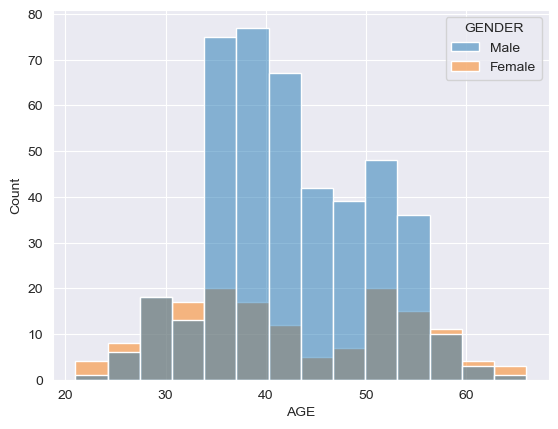

In [22]:
sns.set_style("darkgrid")
sns.histplot(x="AGE", data=df, hue="GENDER")

# wish thearpist to help me manage stress

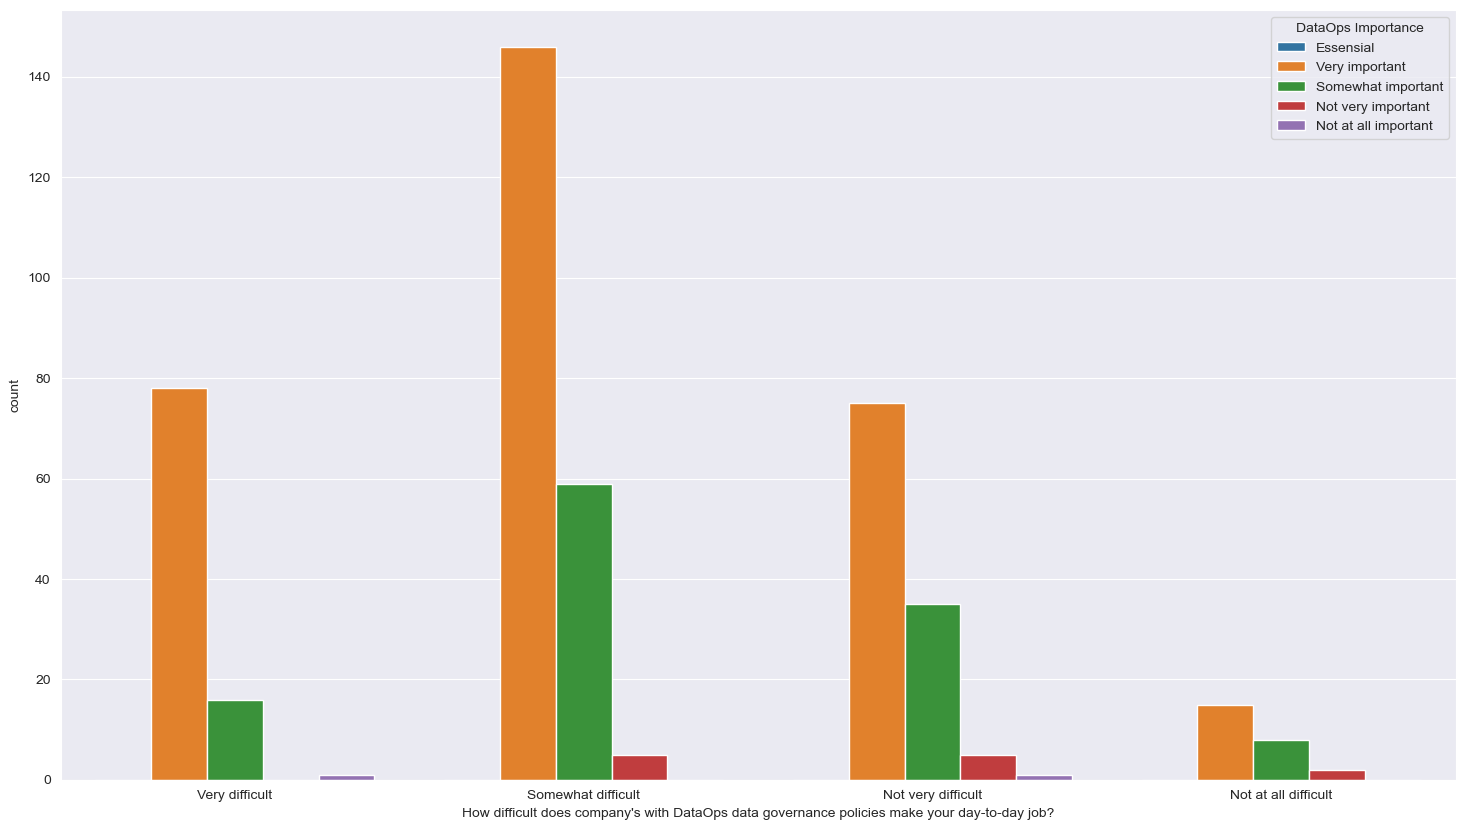

In [23]:
plt.figure(1, (18,10))
filtered_df = df[df['QH'] < 30000]
sns.countplot(data=df,
            x="Q11",
            hue="Q13",
            order=["Very difficult", "Somewhat difficult", "Not very difficult", "Not at all difficult"],
            hue_order=["Essensial", "Very important", "Somewhat important", "Not very important","Not at all important"]
           )
plt.xlabel("How difficult does company's with DataOps data governance policies make your day-to-day job?")
plt.legend(title="DataOps Importance")

In [24]:
# df2 = df[["AGE","Q3","Q4","QH"]]
# plt.figure(figsize=(8,5))
# sns.heatmap(df2.corr(),
#             cmap="RdBu",
#             vmin=-1,
#             vmax=1
#            )

# Who often get request that are not possible to do in the time requested and not possible given the desired function and features requested ?

Text(0.5, 0, 'Receiving requests in job that are simply not possible given the desired function and features of the request')

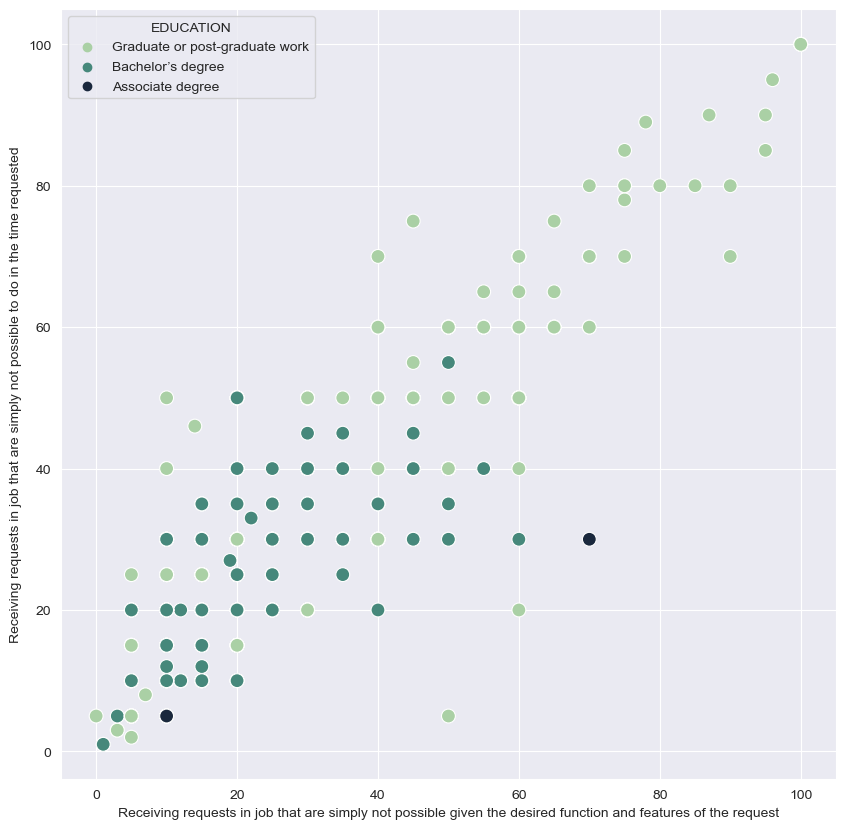

In [25]:
plt.figure(figsize=[10,10])
sns.scatterplot( x = "Q4", 
                 y = "Q3", 
                 data = df, 
                 hue = "EDUCATION",
                 s=100,
                palette="ch:r=-.5,l=.75"
               )
plt.ylabel("Receiving requests in job that are simply not possible to do in the time requested")
plt.xlabel("Receiving requests in job that are simply not possible given the desired function and features of the request")


## People whith higher educatoin allways get hard work

In [ ]:
10 

Text(0, 0.5, 'receiving requests that not possible given the desired function and features of the request')

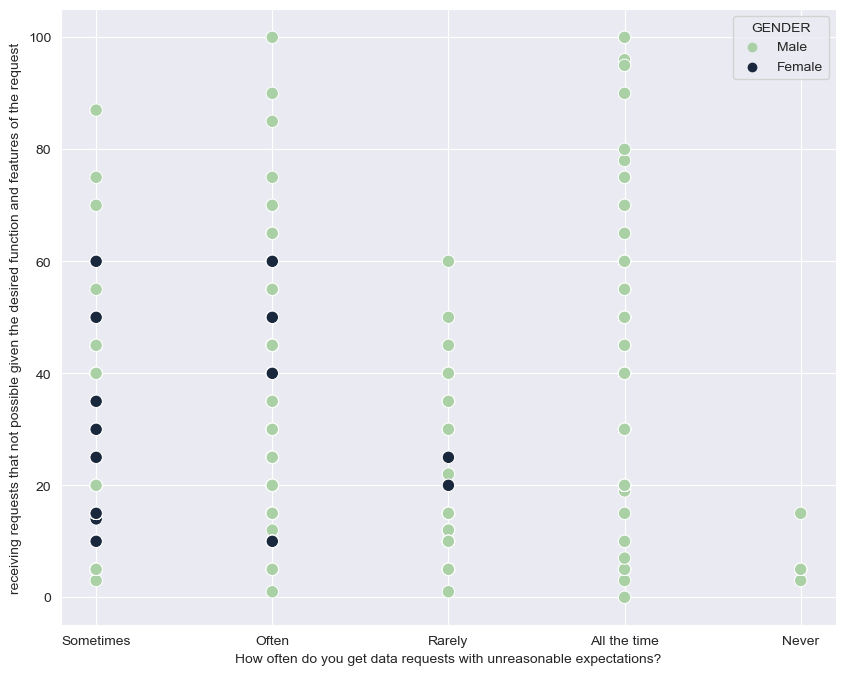

In [26]:
plt.figure(figsize=[10,8])
filtered_df = df[df['QH'] < 70000]
ff = df.sort_values("QE")
sns.scatterplot( x = "Q2", 
                 y = "Q4", 
                 data = ff,
                 hue = "GENDER",
                 s=80,
                palette="ch:r=-.5,l=.75",
                hue_order=["Male", "Female"]
                
               )
plt.xlabel("How often do you get data requests with unreasonable expectations?")
plt.ylabel("receiving requests that not possible given the desired function and features of the request")


In [27]:
QA_M = []
for i in ansQA:
    QA_M.append(i[0:10].replace(" ", "_"))
print(QA_M)
newColNames = ['buy-in',
               'lack of skills',
               'implementation',
               'knowledge',
               'priority',
               'communication',
               'scale','budget' ]


['Maintain_t', 'Ensure_tha', 'Write_and_', 'Manage_con', 'Put_analyt', 'Write_test', 'Maintain_d', 'Develop,_m', 'Create_dat']


<Axes: >

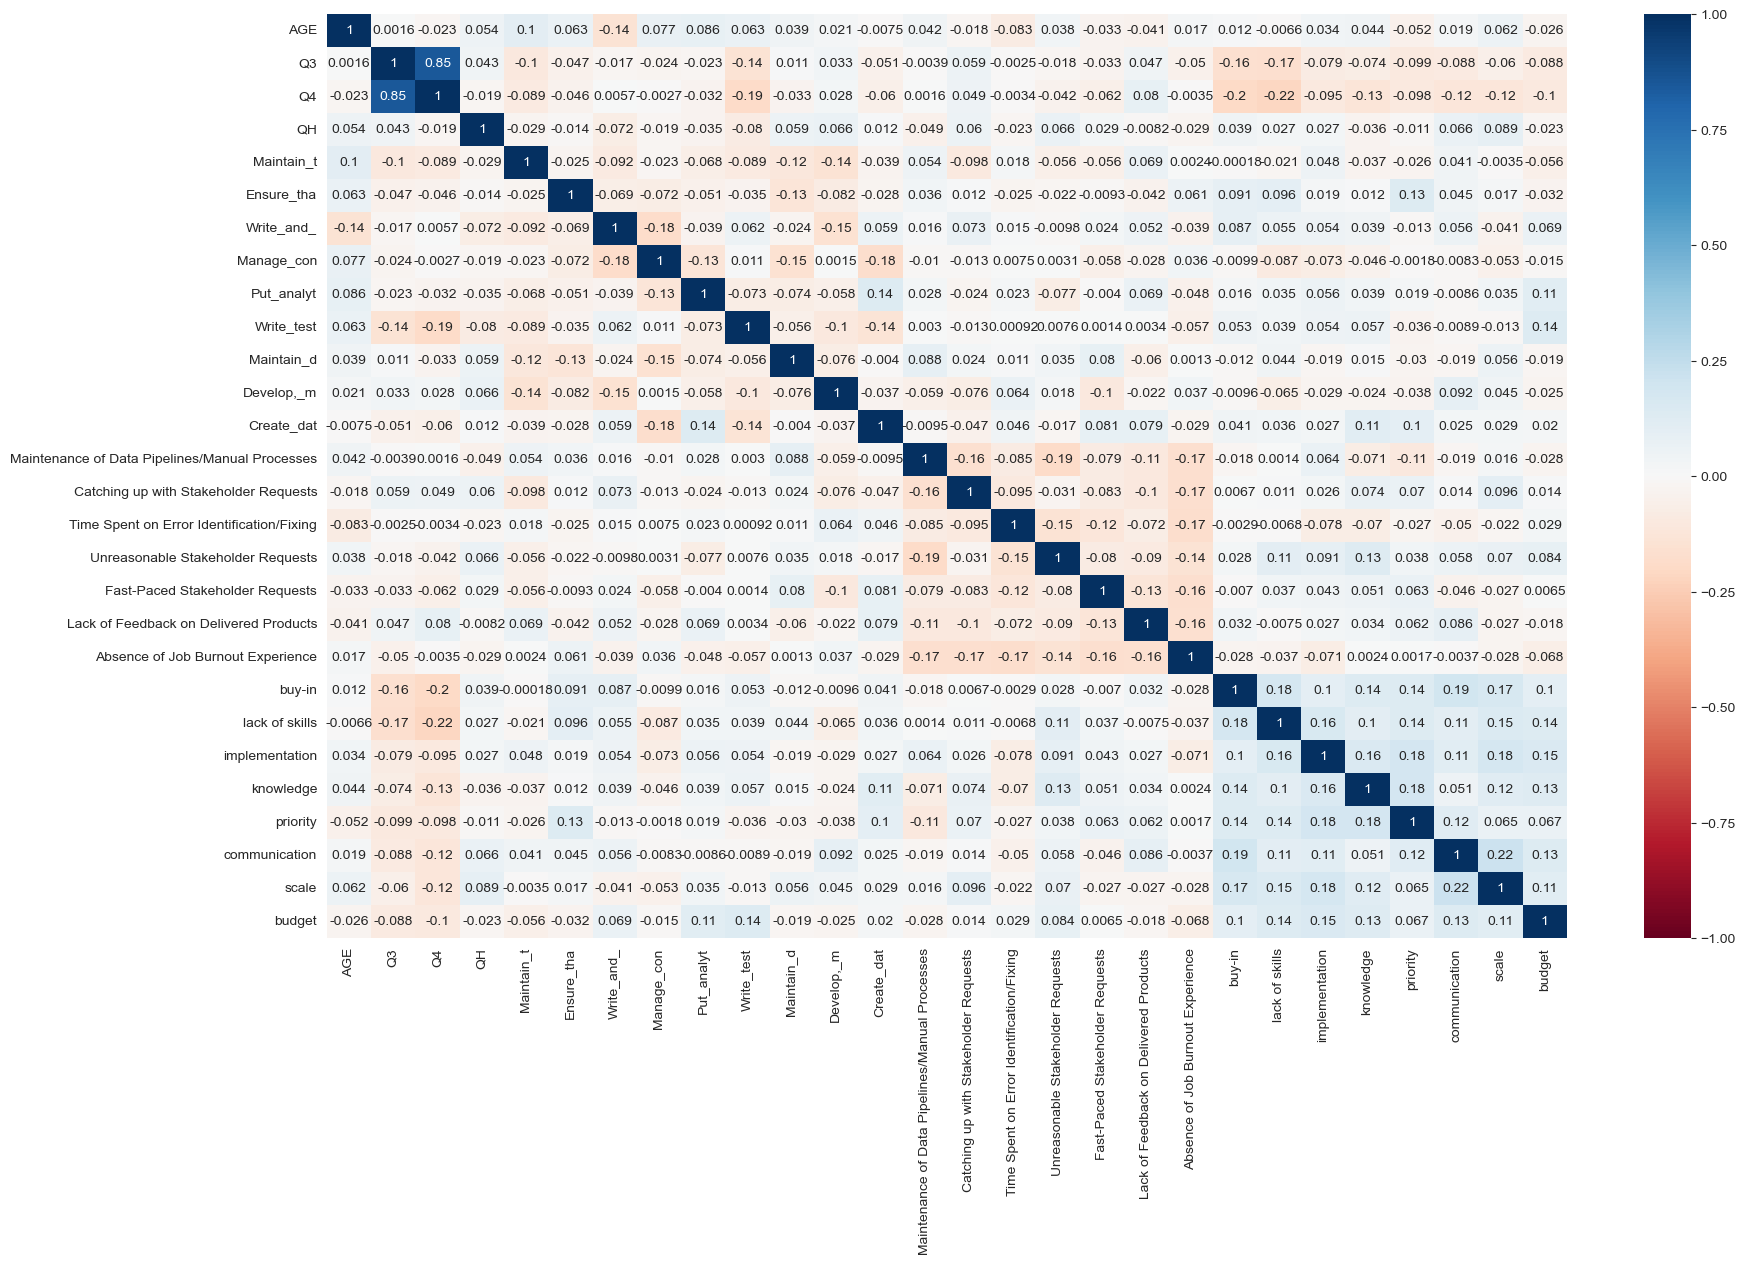

In [28]:
df2 = df[["Q3", "Q4"]]
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),
            cmap="RdBu",
            vmin=-1,
            vmax=1,
            annot=True
           )

In [29]:
# # df_pair = df.drop(["index", "model_year"], axis=1)
# sns.pairplot(df, hue='REGION', palette='coolwarm'); #for numerical values, we use hue for catagorical

<Axes: xlabel='QD', ylabel='Q3'>

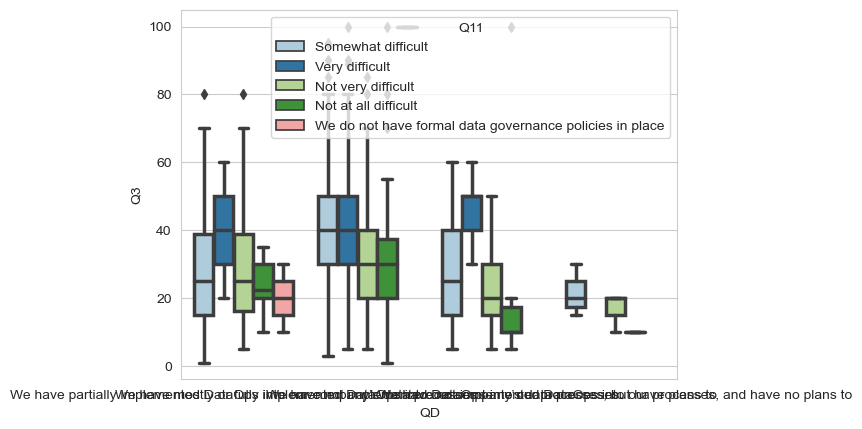

In [30]:
sns.set_style("whitegrid")
sns.boxplot(x="QD",
            y="Q3",
            data=df,
            hue="Q11",
            palette="Paired",
            linewidth=2.5
           )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [31]:
# plt.figure(figsize=[30,30])
# sns.catplot(data=df,
#             x="QD",
#             y="QG",
#             palette="muted"
#            )
# plt.xlabel("How difficult does your company's data governance policies make your day-to-day job?")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 599
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   GENDER                                          597 non-null    object
 1   AGE                                             597 non-null    int64 
 2   EMPLOYMENT                                      597 non-null    object
 3   STATE                                           597 non-null    object
 4   REGION                                          597 non-null    object
 5   EDUCATION                                       597 non-null    object
 6   QB                                              597 non-null    object
 7   QC                                              597 non-null    object
 8   QD                                              597 non-null    object
 9   Q1                                              597 no

In [33]:
df["QF"].value_counts()

5                     93
4                     79
6                     69
10                    54
3                     53
7                     52
2                     42
8                     41
12                    24
9                     16
11                    14
15                    13
14                    12
13                    12
1                      5
18                     4
17                     4
16                     3
20                     2
Less than one year     2
25                     1
30                     1
19                     1
Name: QF, dtype: int64

In [34]:
df = df.replace({"QD":
                 {
                     "We have not implemented DataOps into our processes, and have no plans to" : 1,
                     "We have not implemented DataOps into our processes, but have plans to": 2,
                     "We have partially implemented DataOps into our company’s data processes": 3,
                     "We have mostly or fully implemented DataOps into our company’s data processes":4
                 },
                  "Q1":
                  {
                     "We frequently hope and pray that things don’t break":1,
                      "We are confident they won’t break":2
                  },
                  "Q2":
                  {
                      "Never" : 1,
                      "Rarely" : 2,
                      "Sometimes" : 3,
                      "Often" : 4,
                      "All the time" : 5
                  },
                  "Q6":
                  {
                      "Disagree strongly" : 1,
                      "Disagree somewhat" : 2,
                      "Agree somewhat" : 3,
                      "Agree strongly" : 4
                  },
                  "Q7":
                  {
                      "Never" : 1,
                      "Rarely" : 2,
                      "Sometimes" : 3,
                      "Often" : 4,
                      "All the time" : 5
                  },
                  "Q8":
                  {
                      "Never" : 1,
                      "Rarely" : 2,
                      "Sometimes" : 3,
                      "Often" : 4,
                      "All the time" : 5
                  },
                  "Q9":
                  {
                      "Not at all likely" : 1,
                      "Not very likely" : 2,
                      "Somewhat likely" : 3,
                      "Very likely" : 4
                  },
                  "Q10":
                  {
                      "No, never" : 1,
                      "Yes, once" : 2,
                      "Yes, multiple times": 3
                  },
                  "Q11":
                  {
                      "We do not have formal data governance policies in place" : 0,
                      "Not at all difficult" : 1,
                      "Not very difficult" : 2,
                      "Somewhat difficult" : 3,
                      "Very difficult" : 4
                  },
                  "Q12":
                  {
                      "Not at all effectively" : 1,
                      "Not very effectively" : 2,
                      "Somewhat effectively" : 3,
                      "Very effectively" : 4
                  },
                  "Q13":
                  {
                      "Not at all important" : 1,
                      "Not very important" : 2,
                      "Somewhat important" : 3,
                      "Very important" : 4,
                      "Essential" : 5
                  },
                  "Q15":
                  {
                      "Disagree strongly" : 1,
                      "Disagree somewhat" : 2,
                      "Agree somewhat" : 3,
                      "Agree strongly" : 4
                  },
                  "QE":
                  {
                      "Less than one year" : 0
                  },
                  "QF":
                  {
                      "Less than one year" : 0
                  },
                  "QG":
                  {
                      "Less than one year" : 0,
                      "Less than a year" : 0,
                      "100 years or more" : 110
                  },
                  "QI":
                  {
                      "Less than $10 Million" : 1,
                      "$10 Million to under $25 Million": 2,
                      "$25 Million to under $50 Million": 3,
                      "$50 Million to under $100 Million": 4,
                      "$100 Million to under $250 Million" : 5,
                      "$250 Million to under $500 Million" : 6,
                      "$500 Million to under $1 Billion" : 7,
                      "$1 Billion or more" : 8
                  }
                }
               )


In [35]:
df["QE"] = df["QE"].astype(int)
df["QF"] = df["QF"].astype(int)
df["QG"] = df["QG"].astype(int)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 599
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   GENDER                                          597 non-null    object
 1   AGE                                             597 non-null    int64 
 2   EMPLOYMENT                                      597 non-null    object
 3   STATE                                           597 non-null    object
 4   REGION                                          597 non-null    object
 5   EDUCATION                                       597 non-null    object
 6   QB                                              597 non-null    object
 7   QC                                              597 non-null    object
 8   QD                                              597 non-null    int64 
 9   Q1                                              597 no

<Axes: >

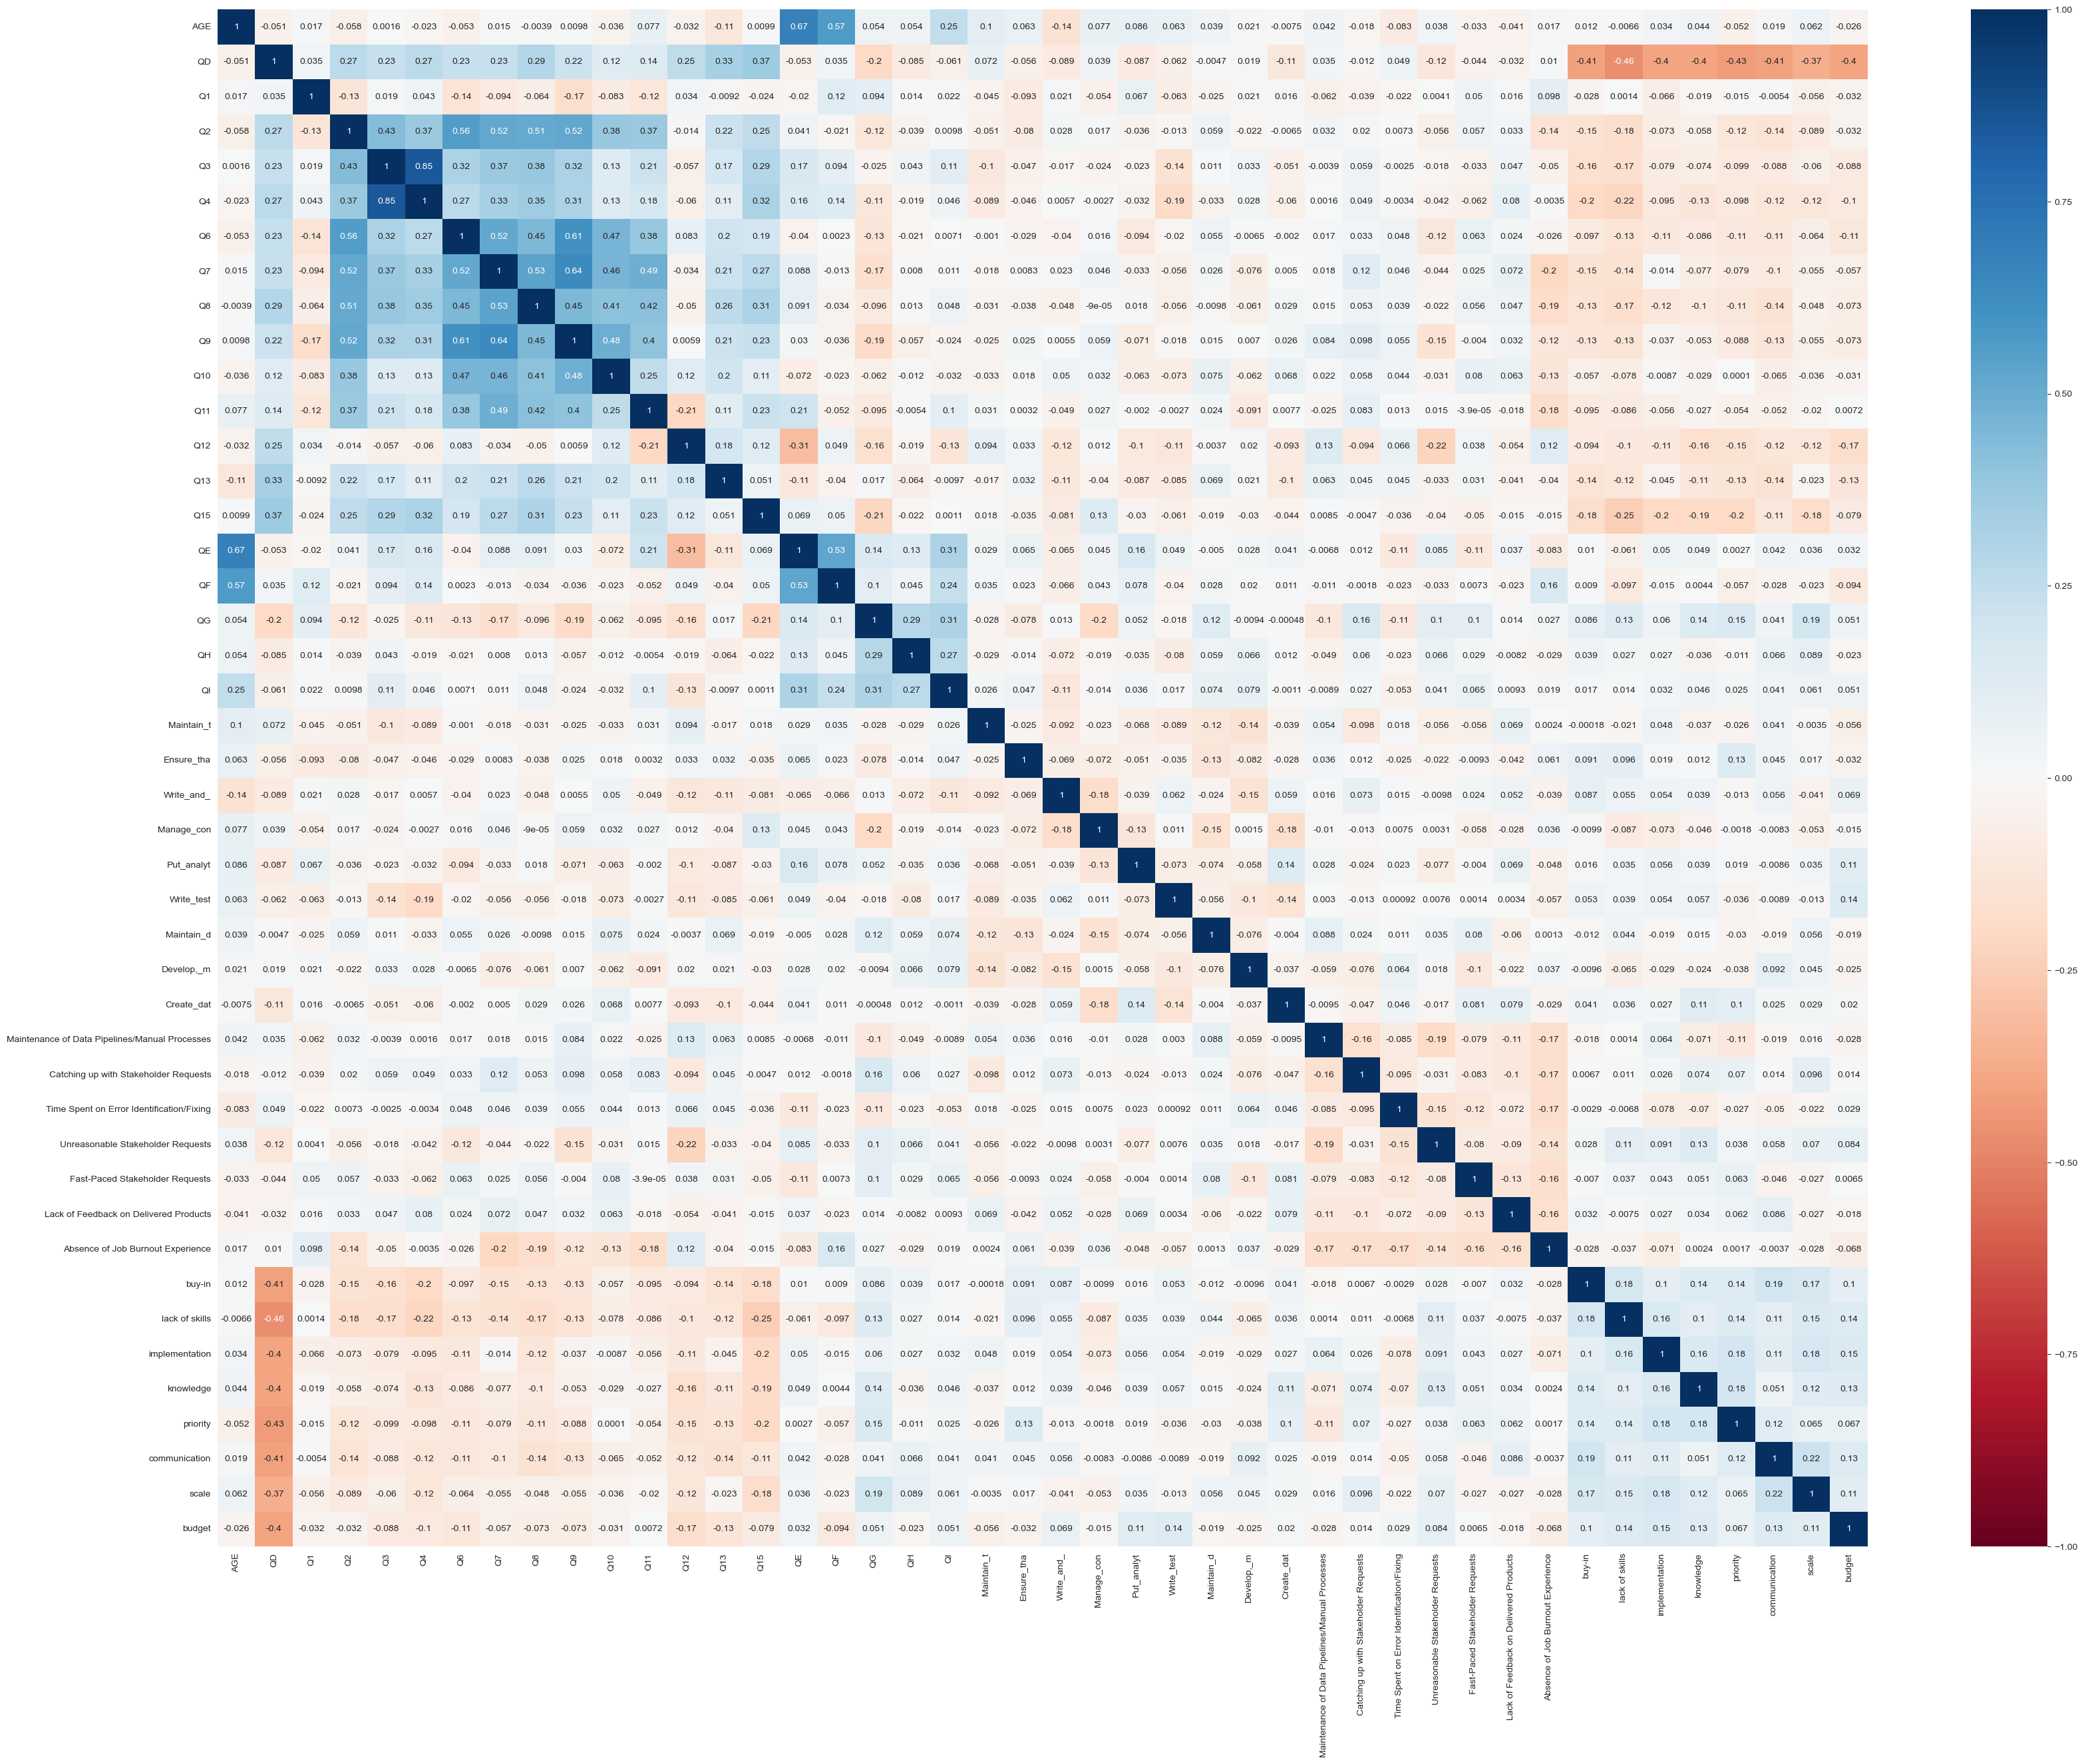

In [37]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),
            cmap="RdBu",
            vmin=-1,
            vmax=1,
            annot=True
           )

<Axes: >

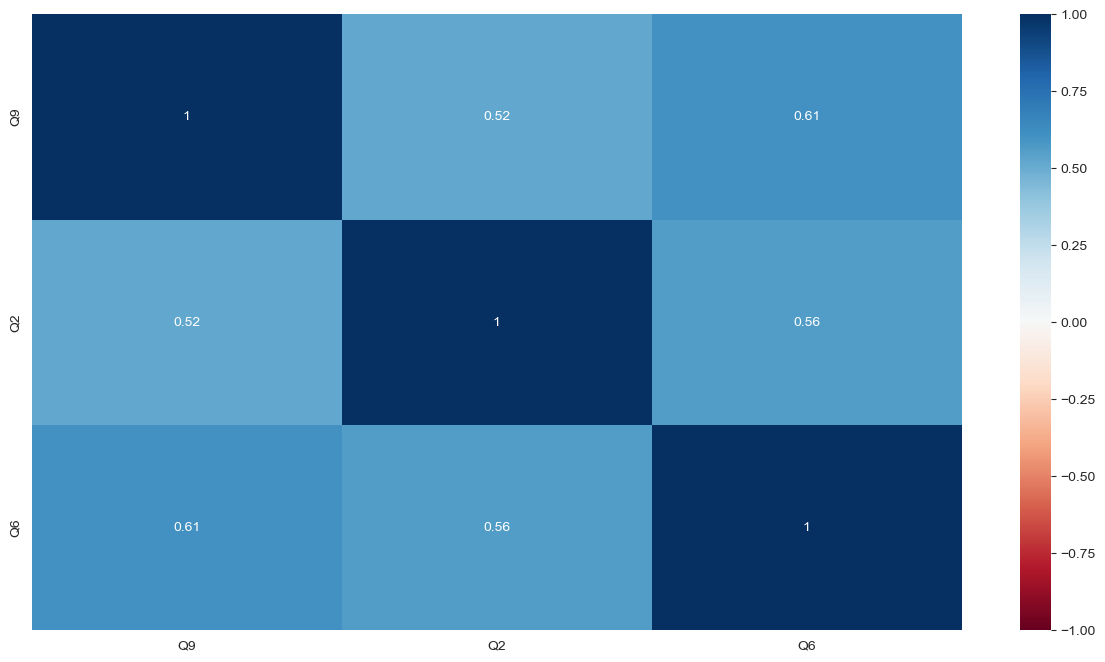

In [38]:
df4 = df[["Q9", "Q2", "Q6"]]
plt.figure(figsize=(15,8))
sns.heatmap(df4.corr(),
            cmap="RdBu",
            vmin=-1,
            vmax=1,
            annot=True
           )